AVOCADO CASE STUDY

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

Column names-
Average Price - the average price of a single avocado,
type - conventional or organic,
year - the year,
Region - the city or region of the observation,
Total Volume - Total number of avocados sold,
4046 - Total number of avocados with PLU 4046 sold,
4225 - Total number of avocados with PLU 4225 sold,
4770 - Total number of avocados with PLU 4770 sold


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
data=pd.read_csv("https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Evaluation%20project-First%20phase/Avocado.dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#Checking random samples
data.sample(12)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5015,23,17-07-2016,1.46,804071.94,200748.22,481290.68,43042.94,78990.10,77461.44,106.44,1422.22,conventional,2016,SanFrancisco
14195,26,26-06-2016,1.74,41165.72,813.21,32449.11,68.65,7834.75,196.26,7638.49,0.00,organic,2016,Seattle
3236,12,02-10-2016,1.83,509215.79,37926.13,311085.71,90495.41,69708.54,58004.41,530.52,11173.61,conventional,2016,Chicago
7905,10,22-10-2017,1.48,468703.71,115638.44,168488.40,10445.22,174131.65,134104.55,39747.32,279.78,conventional,2017,Seattle
5574,10,16-10-2016,0.87,902725.42,490768.42,72347.94,13559.50,326049.56,204702.97,121346.59,0.00,conventional,2016,WestTexNewMexico
5536,24,10-07-2016,1.01,6487362.71,2293685.50,1475916.77,111309.46,2606450.98,1823295.07,762671.30,20484.61,conventional,2016,West
8725,7,04-02-2018,0.96,365637.29,206007.07,24133.66,480.95,135015.61,79274.34,55614.60,126.67,conventional,2018,Jacksonville
11018,20,09-08-2015,2.02,18149.27,4930.53,10792.14,0.00,2426.60,0.00,2426.60,0.00,organic,2015,Portland
45,45,15-02-2015,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.00,conventional,2015,Albany
2905,45,14-02-2016,0.97,481484.29,313342.08,57925.31,1008.13,109208.77,74366.38,34842.39,0.00,conventional,2016,Atlanta


In [5]:
#Checking shape and size of data
data.shape

(18249, 14)

In [6]:
#Checking for datatype and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Except Date,type and region, all other columns have integer and float data type

In [7]:
#Confirming for null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values in any of the columns

In [8]:
#Checking for unique values in Region column
data["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [33]:
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [9]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations-

1.There are no null values.

2. The standard deviation ranges from 0.4 to 17692 which implies that the scale of distribution is not normal.


3. A lot of columns seem to have negative/positive skewness

In [4]:
#Removing irrelavant column
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


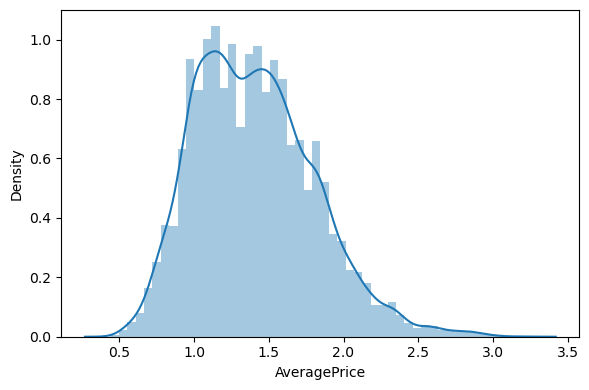

In [27]:
#let's find out more about the distribution through graphical representatioon
plt.figure(figsize=(6,4))
sns.distplot(data['AveragePrice'])
plt.xlabel('AveragePrice',fontsize=10)
plt.tight_layout()

There is slight skewness(range 2.7 to 3.4) in average price

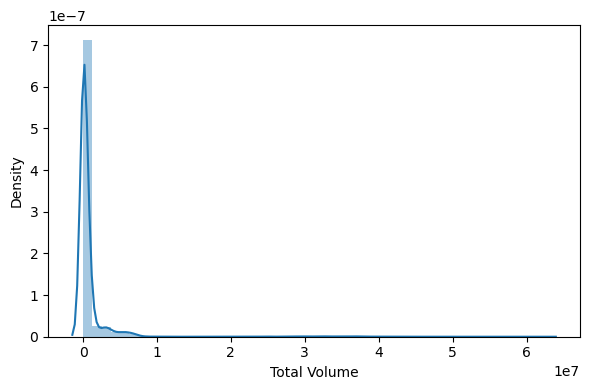

In [28]:
plt.figure(figsize=(6,4))
sns.distplot(data['Total Volume'])
plt.xlabel('Total Volume',fontsize=10)
plt.tight_layout()

Total volume is highly skewed to right

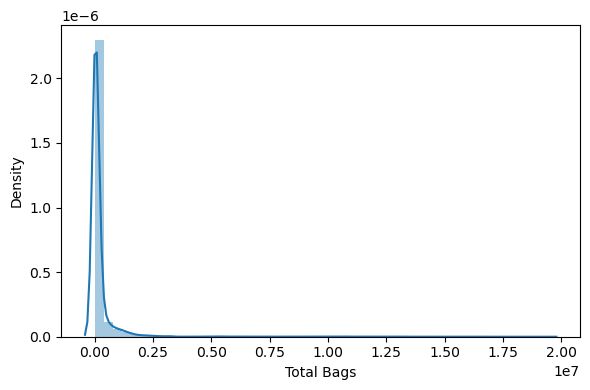

In [29]:
plt.figure(figsize=(6,4))
sns.distplot(data['Total Bags'])
plt.xlabel('Total Bags',fontsize=10)
plt.tight_layout()

TotalBags is highly skewed to right

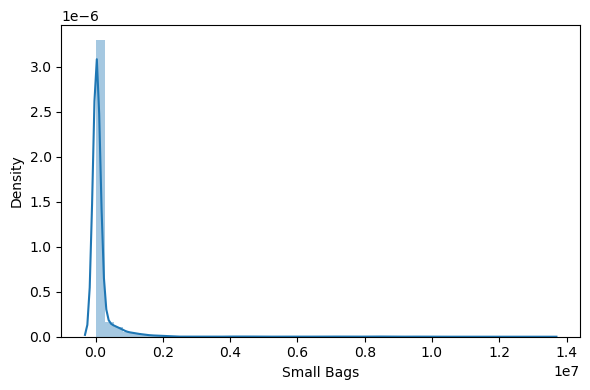

In [30]:
plt.figure(figsize=(6,4))
sns.distplot(data['Small Bags'])
plt.xlabel('Small Bags',fontsize=10)
plt.tight_layout()

Small Bags is highly skewed to right

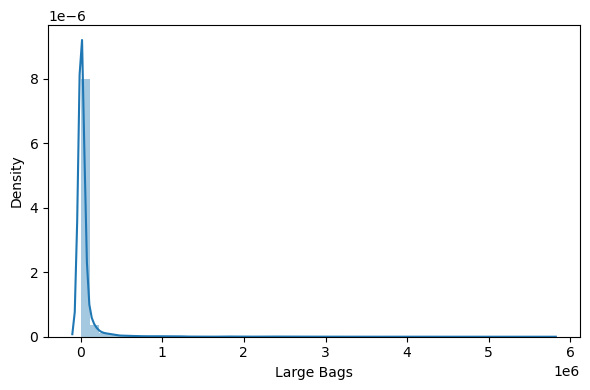

In [31]:
plt.figure(figsize=(6,4))
sns.distplot(data['Large Bags'])
plt.xlabel('Large Bags',fontsize=10)
plt.tight_layout()

Large Bags is highly skewed to right

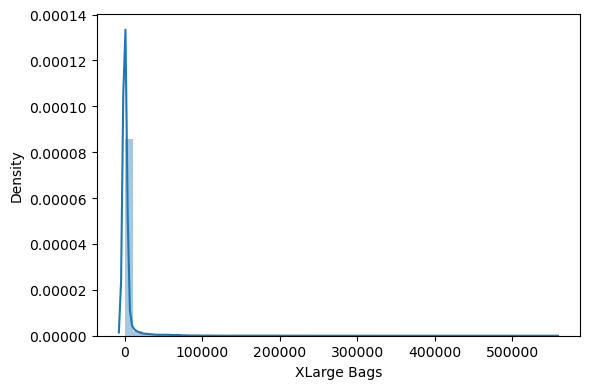

In [32]:
plt.figure(figsize=(6,4))
sns.distplot(data['XLarge Bags'])
plt.xlabel('XLarge Bags',fontsize=10)
plt.tight_layout()

XLarge Bags is highly skewed to right

In [6]:
data_copy=data.drop(columns=['Date','type','region'])

In [7]:
data_copy

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


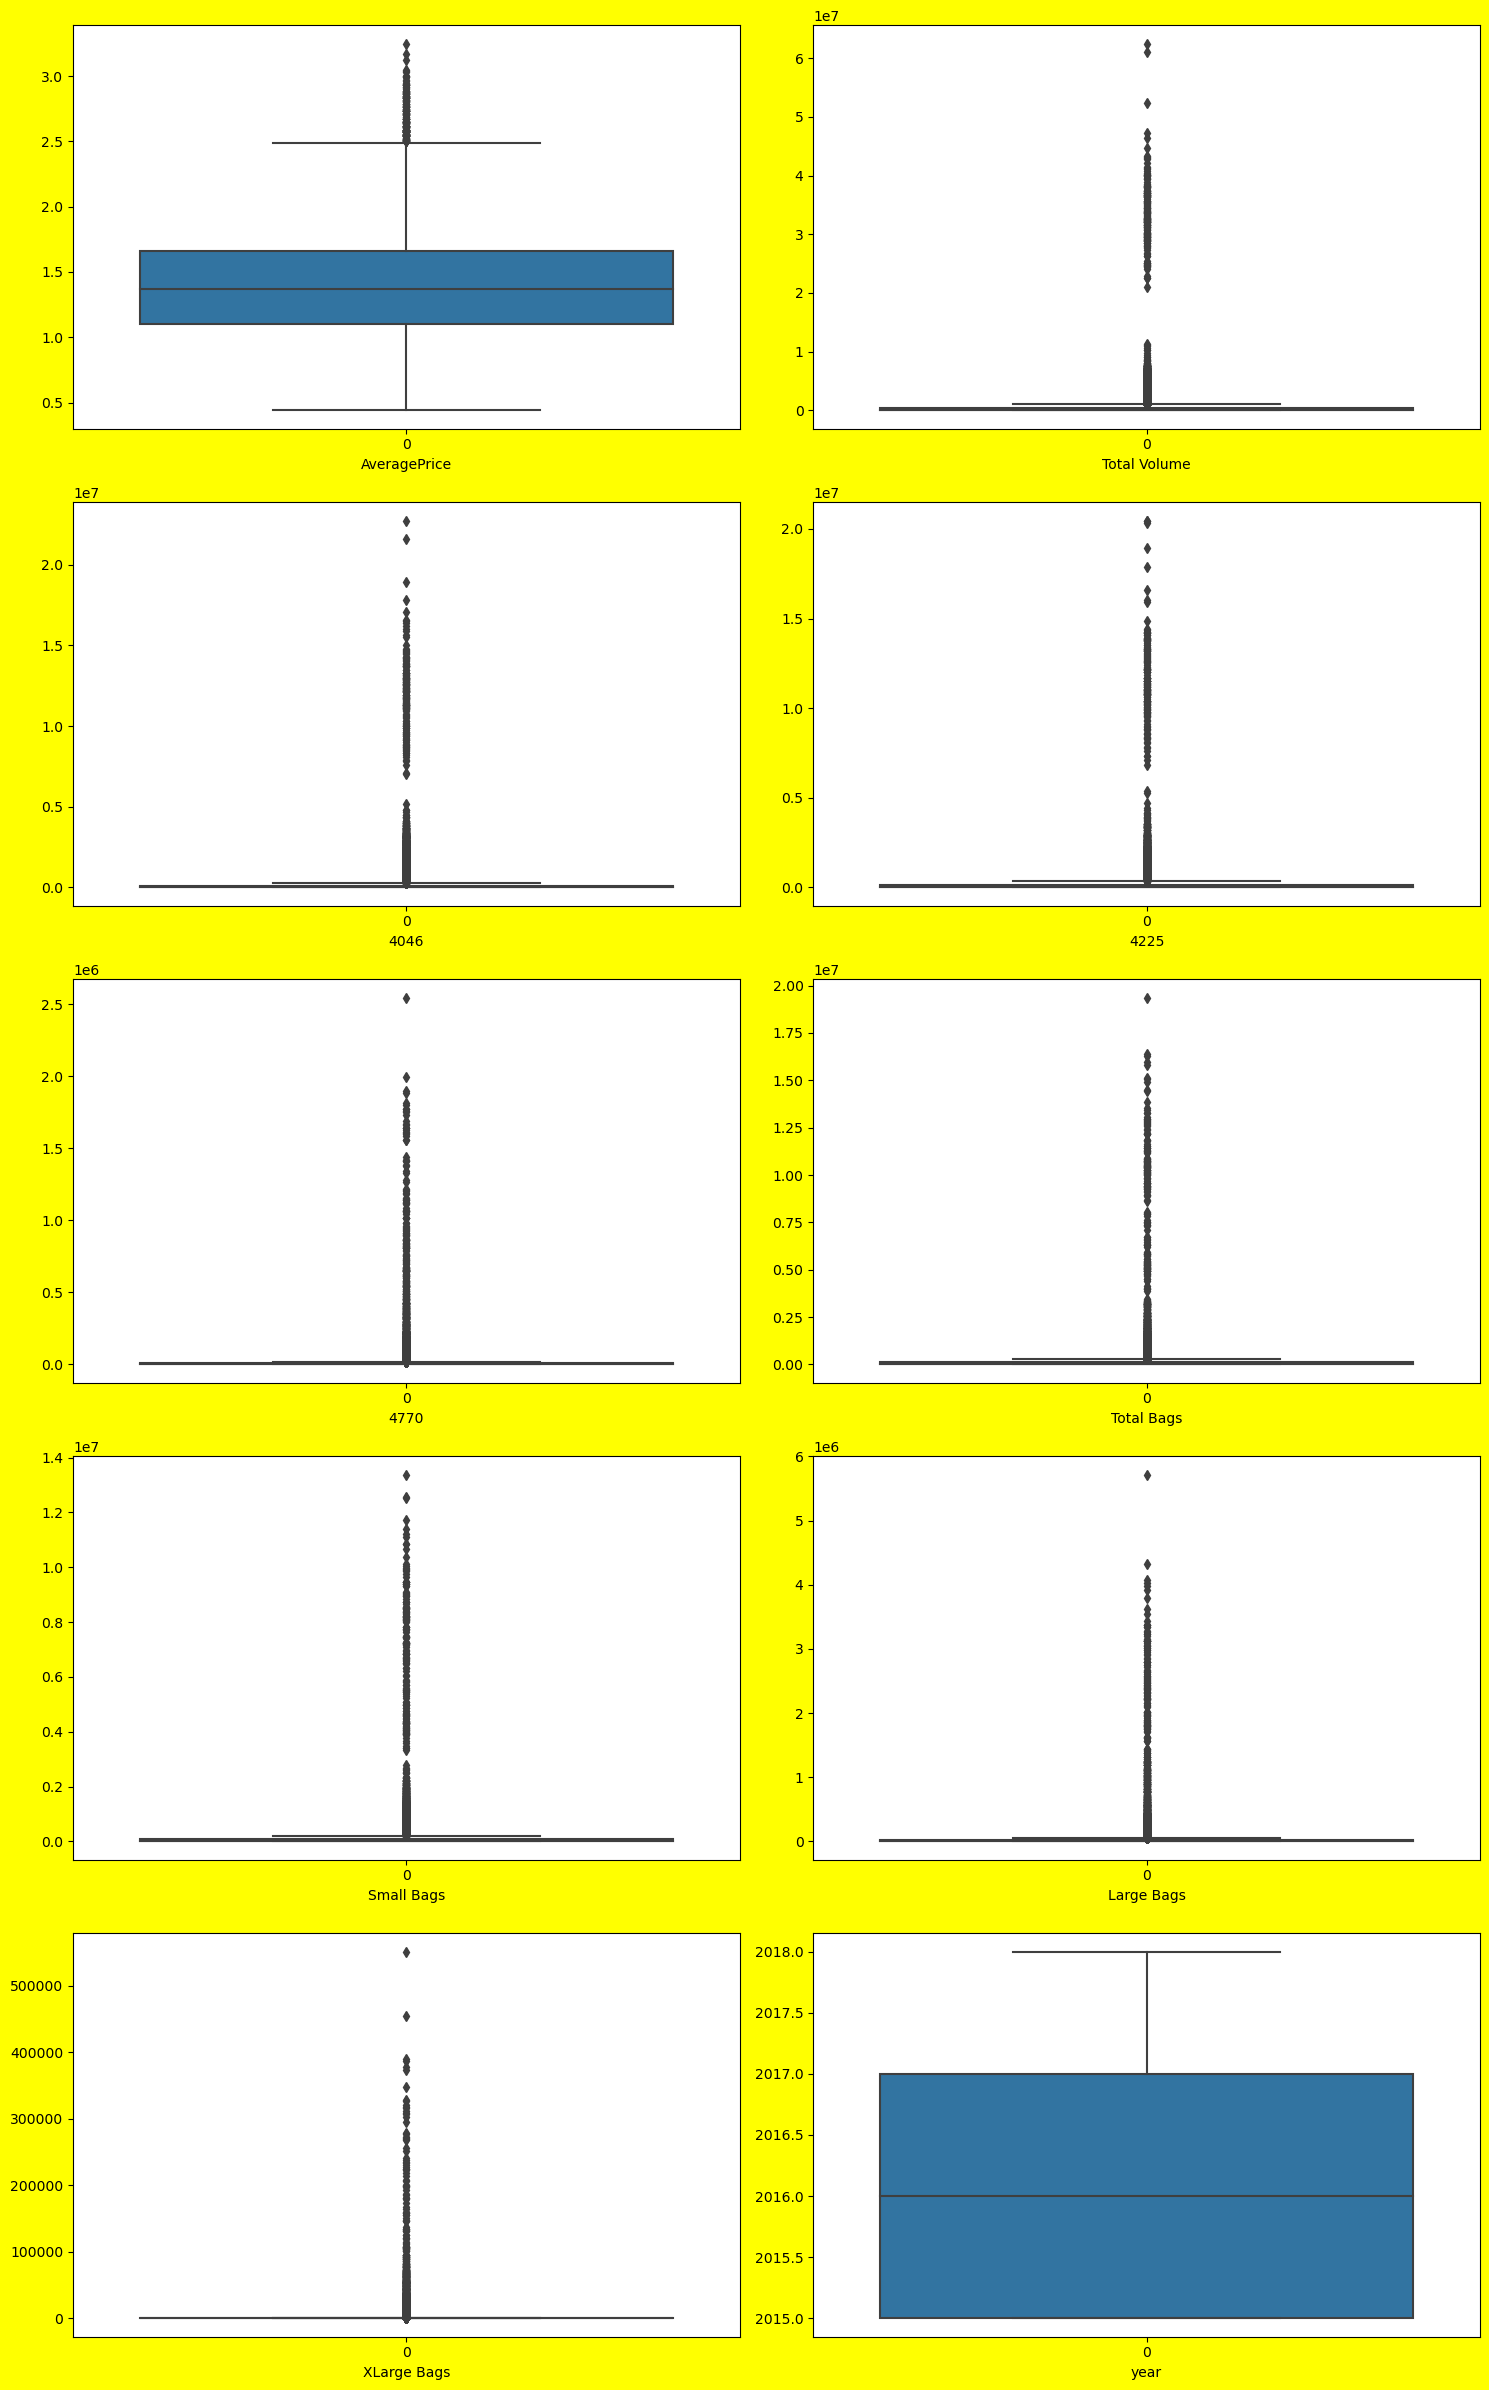

In [53]:
#Let's check for outliers
plt.figure(figsize=(15,24),facecolor='yellow')
plotnumber=1

for column in data_copy:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data_copy[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

It is evident that except year, all other columns have outliers

In [35]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Text(0.5, 1.0, 'Count of sales on type')

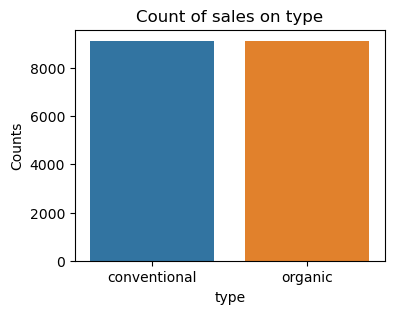

In [49]:
#Let's check count in types
plt.figure(figsize=(4,3))
sns.countplot(x='type',data=data)
plt.xlabel('type')
plt.ylabel('Counts')
plt.title('Count of sales on type')


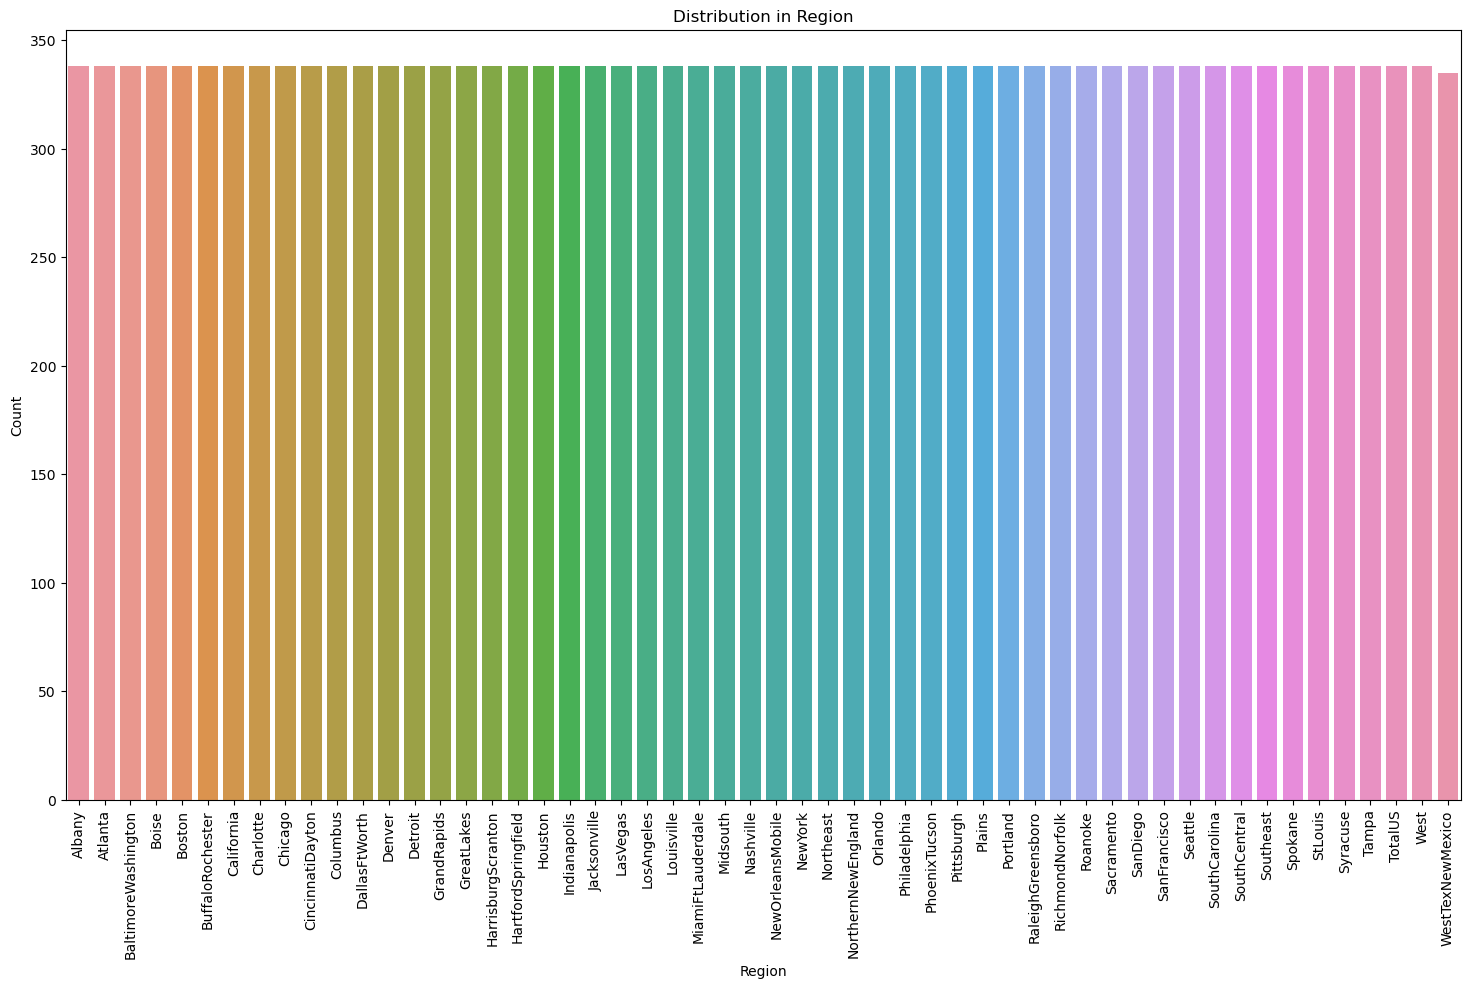

In [57]:
#Let's check count in region
plt.figure(figsize=(18, 10))
sns.countplot(data=data, x='region')
plt.xticks(rotation=90)
plt.title('Distribution in Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

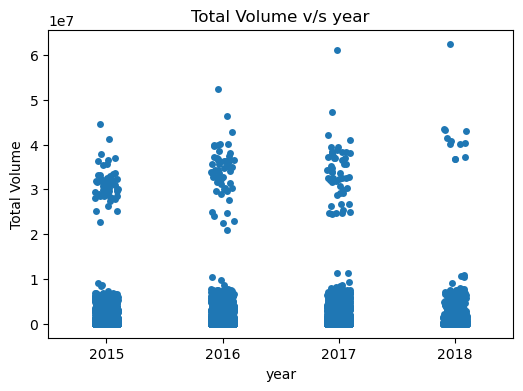

In [58]:
#Let's check total volumes sold yearwise
plt.figure(figsize=(6,4))
sns.stripplot(x='year', y='Total Volume', data=data)
plt.title('Total Volume v/s year')
plt.show()

Year 2016 and 2017 have most sale volumes

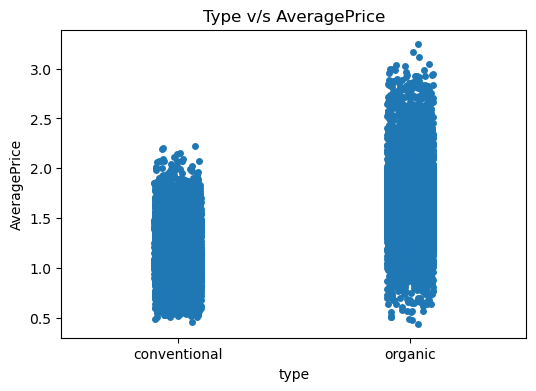

In [61]:
##Let's check total volumes sold yearwise
plt.figure(figsize=(6,4))
sns.stripplot(x='type', y='AveragePrice', data=data)
plt.title('Type v/s AveragePrice')
plt.show()

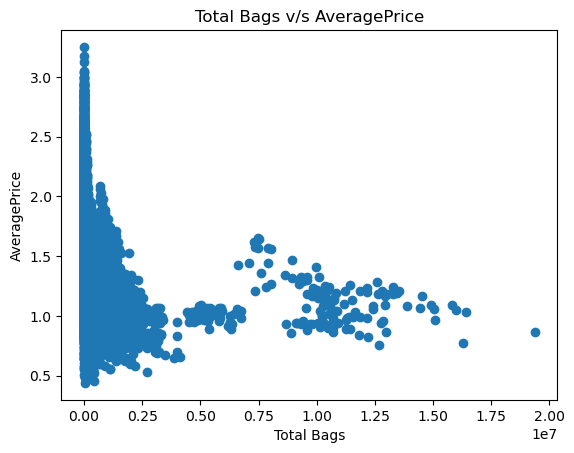

In [69]:
plt.scatter(data['Total Bags'], data['AveragePrice'])
plt.xlabel('Total Bags')
plt.ylabel('AveragePrice')
plt.title('Total Bags v/s AveragePrice')
plt.show()

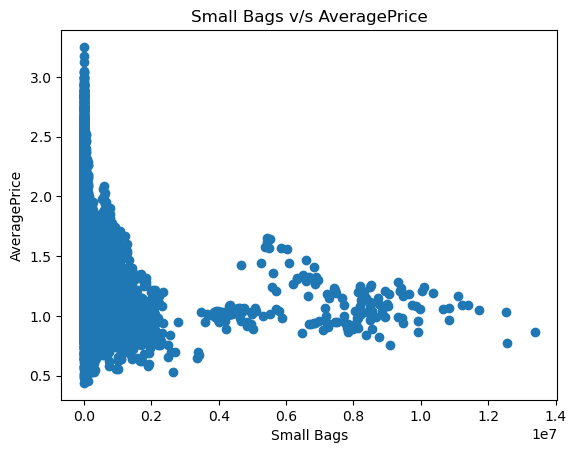

In [70]:
plt.scatter(data['Small Bags'], data['AveragePrice'])
plt.xlabel('Small Bags')
plt.ylabel('AveragePrice')
plt.title('Small Bags v/s AveragePrice')
plt.show()

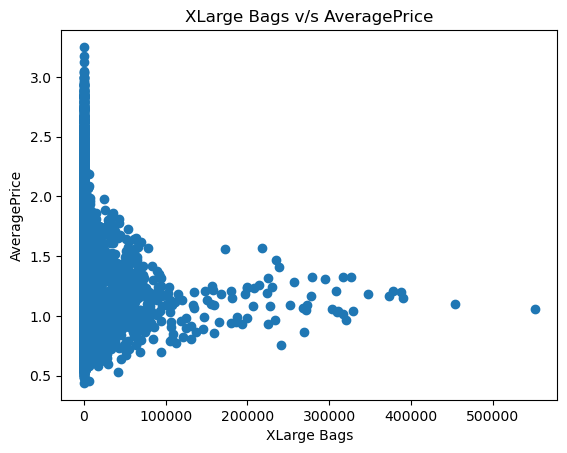

In [71]:
plt.scatter(data['XLarge Bags'], data['AveragePrice'])
plt.xlabel('XLarge Bags')
plt.ylabel('AveragePrice')
plt.title('XLarge Bags v/s AveragePrice')
plt.show()

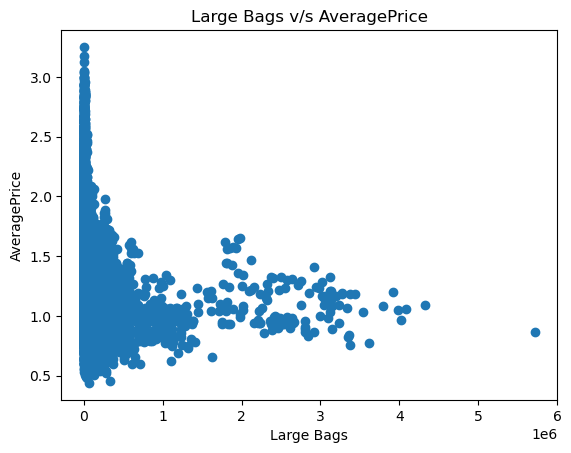

In [72]:
plt.scatter(data['Large Bags'], data['AveragePrice'])
plt.xlabel('Large Bags')
plt.ylabel('AveragePrice')
plt.title('Large Bags v/s AveragePrice')
plt.show()

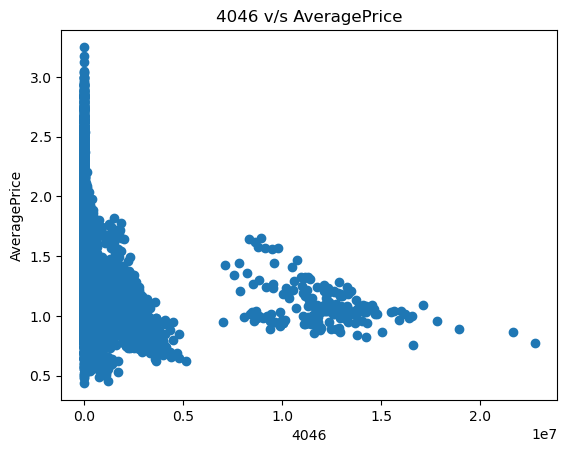

In [73]:
plt.scatter(data['4046'], data['AveragePrice'])
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.title('4046 v/s AveragePrice')
plt.show()

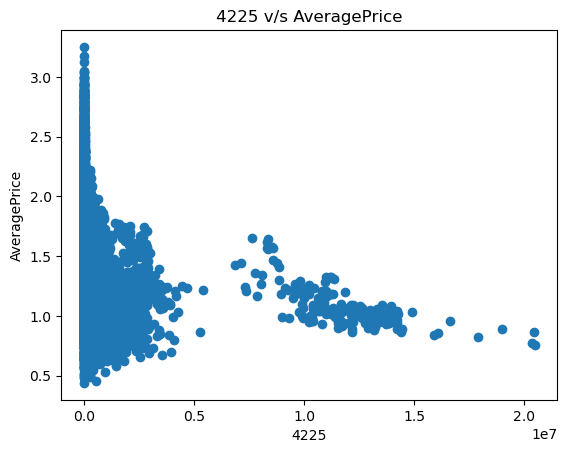

In [74]:
plt.scatter(data['4225'], data['AveragePrice'])
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.title('4225 v/s AveragePrice')
plt.show()

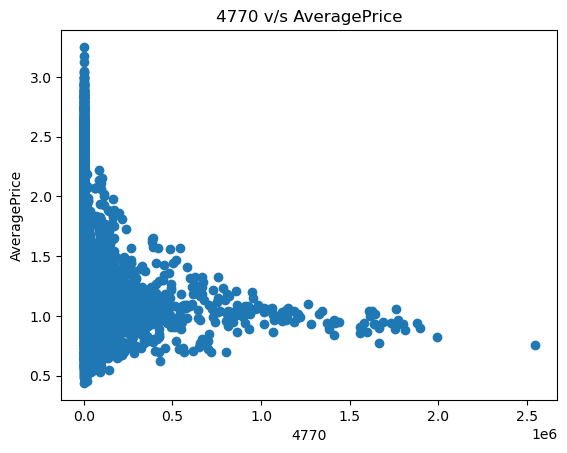

In [75]:
plt.scatter(data['4770'], data['AveragePrice'])
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.title('4770 v/s AveragePrice')
plt.show()

We can figure out that the Average price seems to be decreasing as the quantity of Avocado sale increases. This shows that the features and Average price are negatively correlated

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

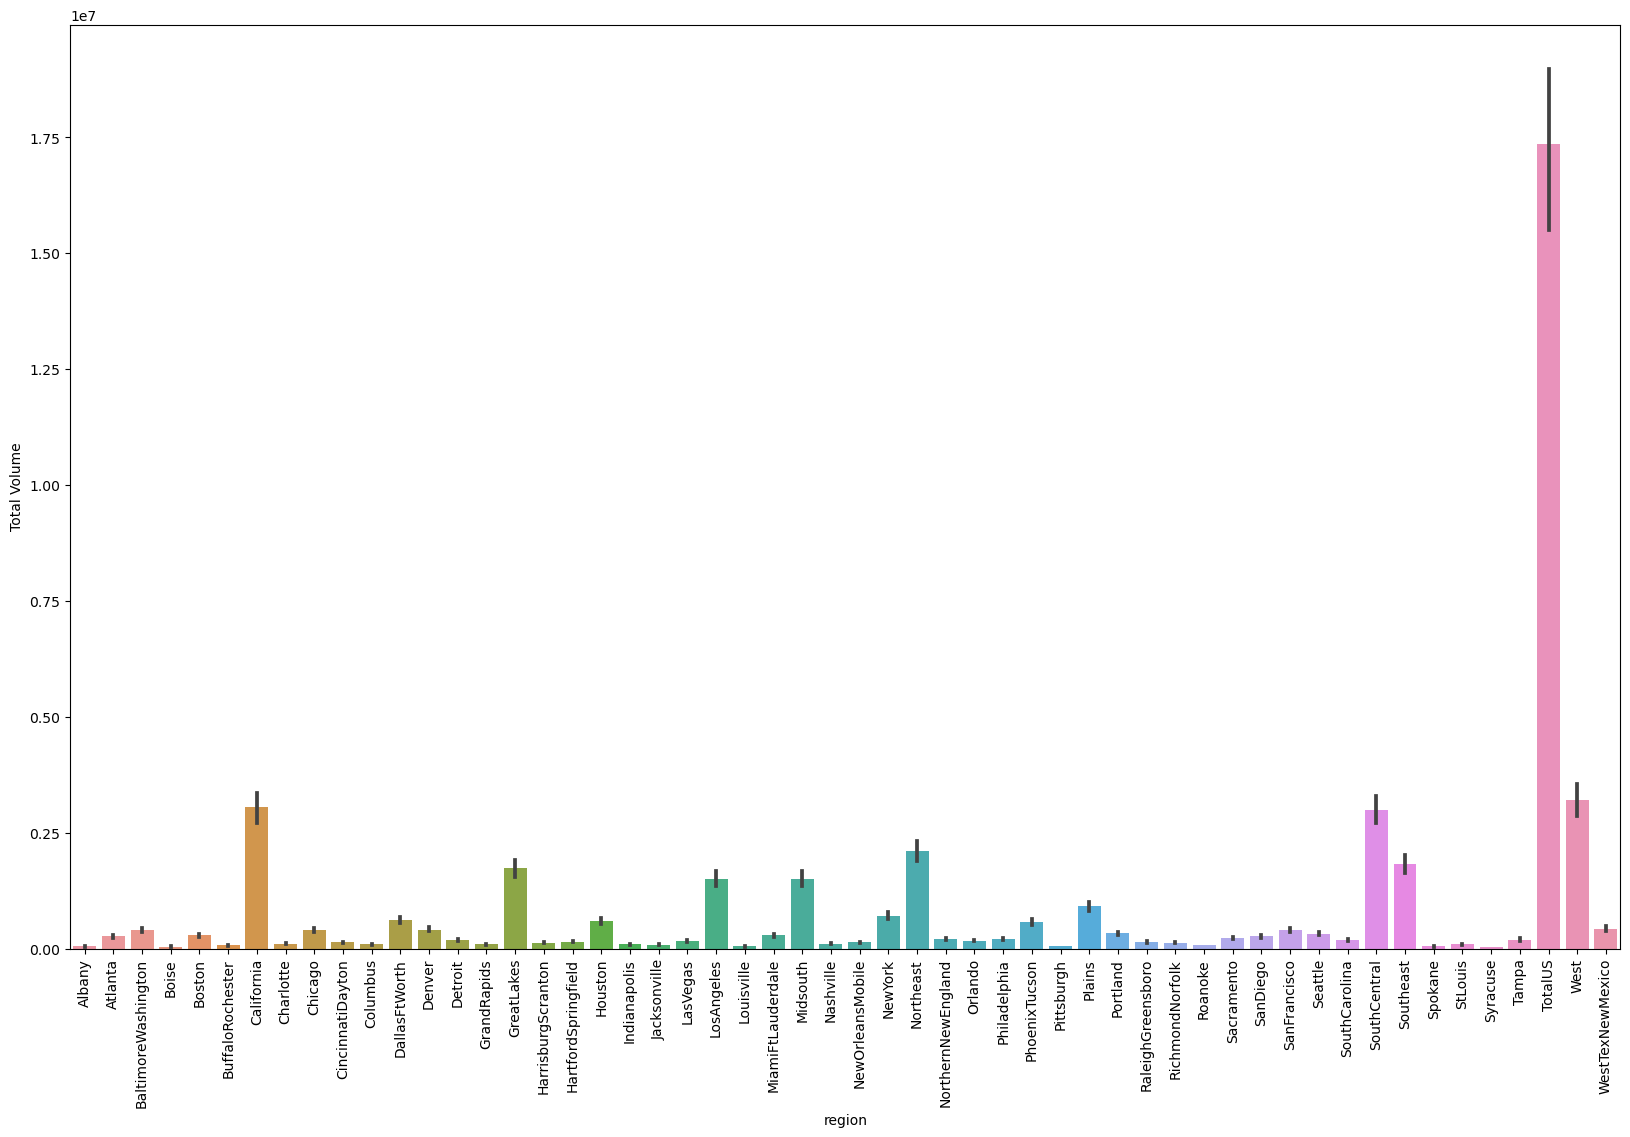

In [77]:
plt.figure(figsize=(20, 12))
sns.barplot(x='region', y='Total Volume', data=data)
plt.xticks(rotation=90)

Total US region has the highest sales volume followed by West, California, South Central and the rest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

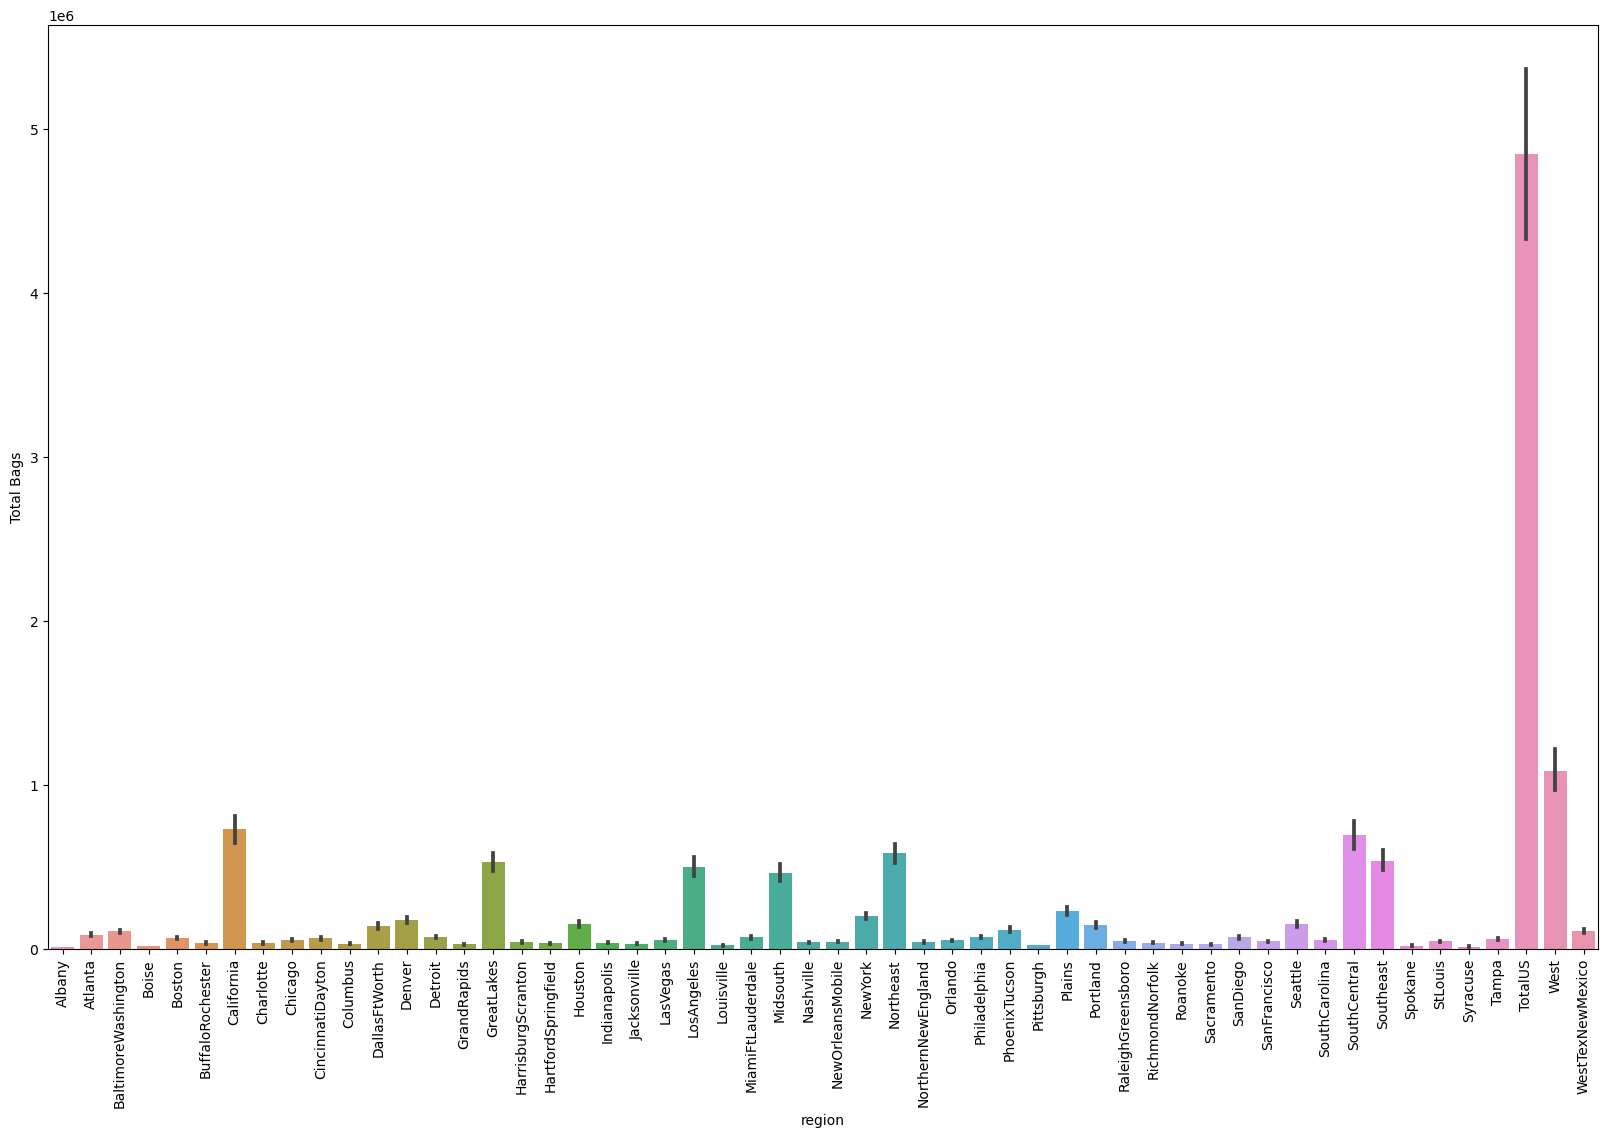

In [78]:
plt.figure(figsize=(20, 12))
sns.barplot(x='region', y='Total Bags', data=data)
plt.xticks(rotation=90)

In [8]:
#Converting date Column into correct date Format
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['Year']=data['Date'].dt.year


In [9]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015


In [10]:
data.drop(columns=['Date','year'],axis=1, inplace=True)

In [11]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,29,2015


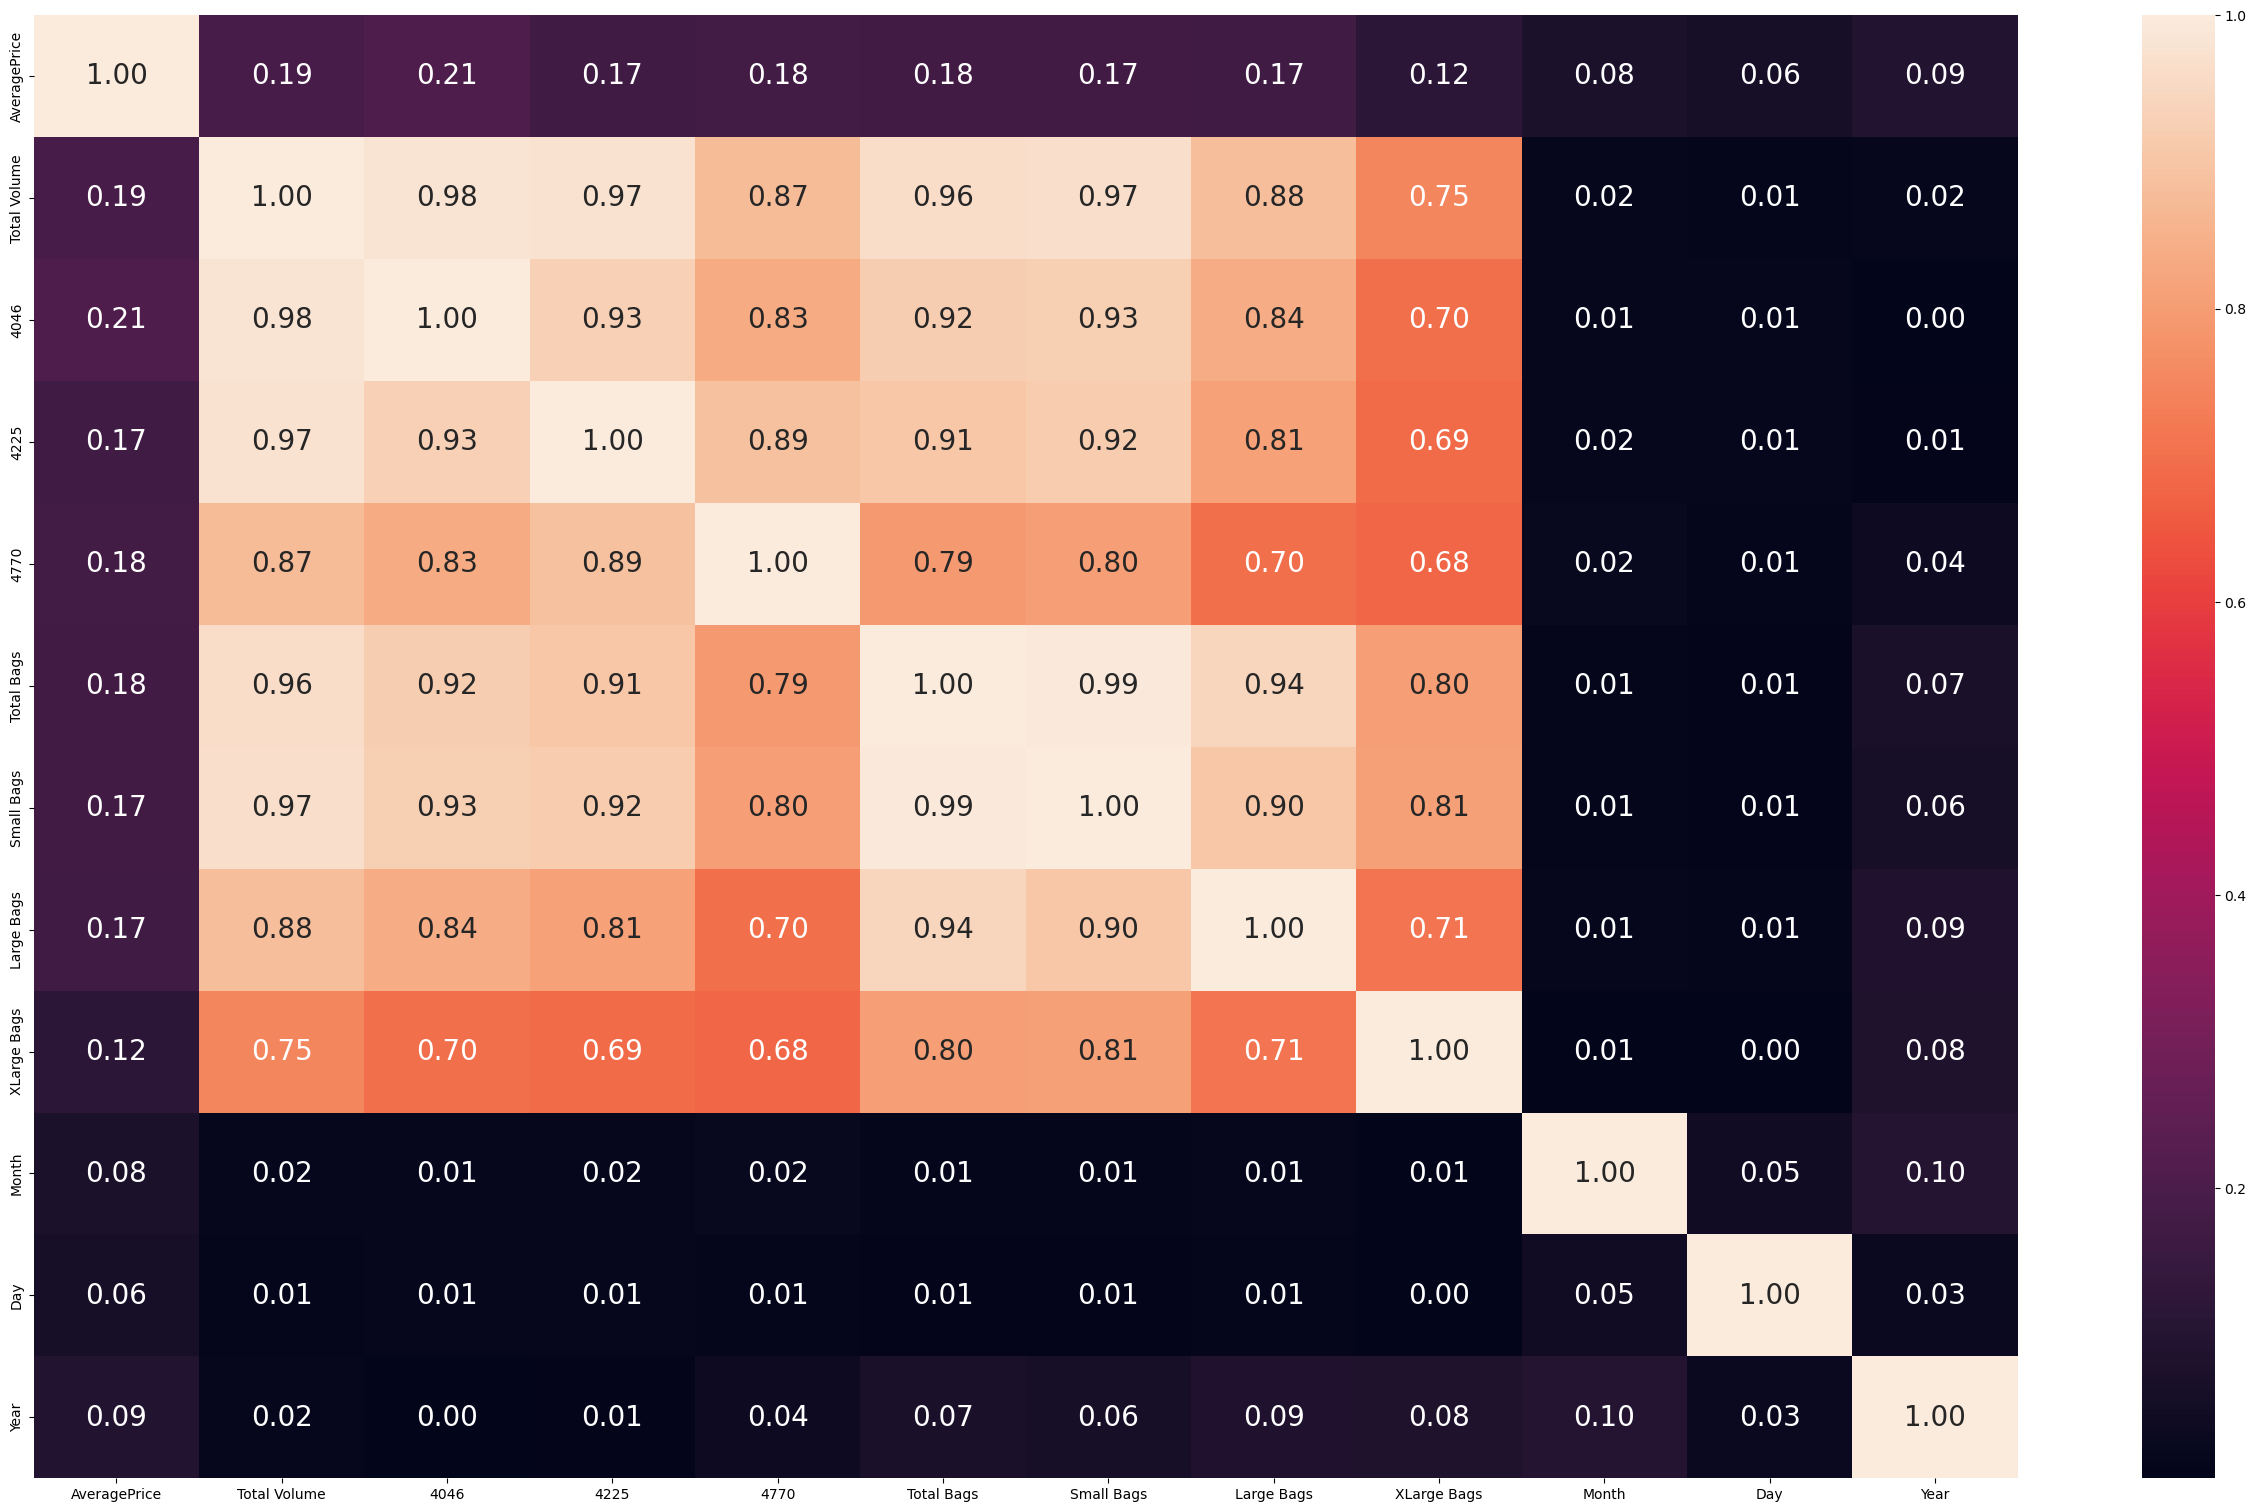

In [84]:
#Let's check correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(32,19))
sns.heatmap(data_corr, annot=True, fmt='0.2f',annot_kws={'size':20})
plt.show()

Except Year, Day and Month, all other features show strong correlation with each other which proves that there is multicollinearity issue and it requires to be addressed.

In [12]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
data2=le.fit_transform(data['region'])
data3=le.fit_transform(data['type'])

In [15]:
data['region']=data2
data['type']=data3

In [16]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,29,2015


In [17]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
Month             int64
Day               int64
Year              int64
dtype: object

There are no more object type data in any of the columns and all required columns have been encoded

In [18]:
#Let's remove outliers
from scipy.stats import zscore


In [19]:
z_score=zscore(data[['Total Volume','4046','4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score=np.abs(z_score)
new_n=(abs_z_score<3).all(axis=1)
data=data[new_n]

In [20]:
#Handeling Skewness
data.skew().sort_values()

type           -0.052210
Day            -0.004650
region          0.005773
Month           0.042069
Year            0.220792
AveragePrice    0.560969
Total Volume    3.782060
Total Bags      4.082103
Small Bags      4.238647
4225            4.472729
4046            4.928850
Large Bags      5.072468
4770            5.137120
XLarge Bags     6.159391
dtype: float64

Still a few columns like Total Volume, Total Bags etc, have skewness

In [21]:
tlist=['Total Volume','4046','4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in tlist:
    data[i]=np.log1p(data[i])

In [22]:
data.skew().sort_values()

Small Bags     -0.782875
Large Bags     -0.603830
4225           -0.595360
4046           -0.408827
Total Bags     -0.394347
type           -0.052210
Total Volume   -0.039041
Day            -0.004650
region          0.005773
Month           0.042069
4770            0.079074
Year            0.220792
AveragePrice    0.560969
XLarge Bags     1.225926
dtype: float64

The skewness looks a lot better than before.

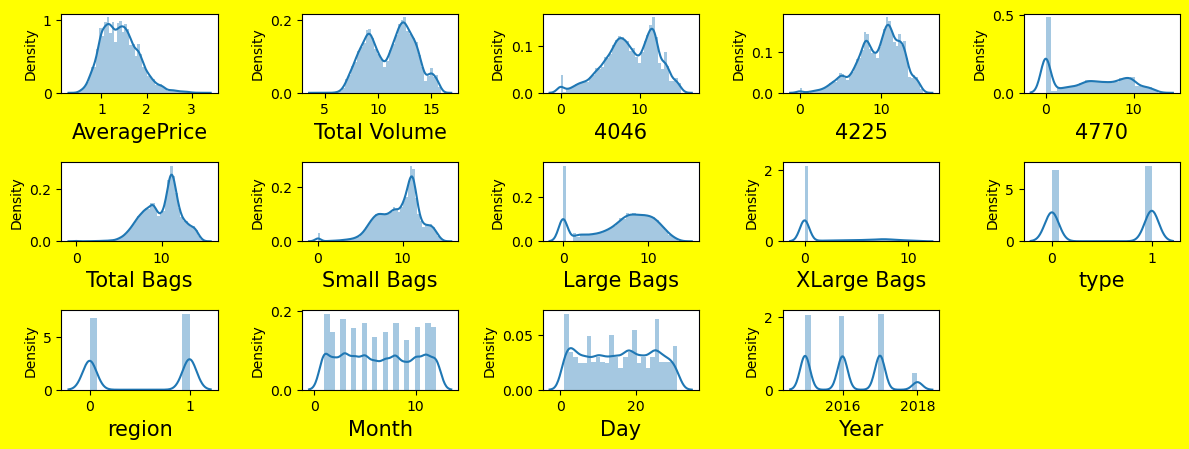

In [114]:
#let's find out more about the distribution through graphical representatioon
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in data_copy:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data_copy[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The distribution is also a loot better now as compared to how it was before.

In [23]:
data1=data

In [24]:
data1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,12,27,2015
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,12,20,2015
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,12,13,2015
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,6,12,2015
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,11,29,2015


In [25]:
#Separating features and label
#Regression model data-
X=data.drop(columns=['AveragePrice'],axis=1)
y=data['AveragePrice']

In [26]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [27]:
#For Classification model data-
U=data1.drop(columns=['region'],axis=1)
v=data1['region']

In [28]:
v

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17782, dtype: int32

In [29]:
#Scaling data-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
X_scaled

array([[-0.05461965, -0.58144133,  0.43648518, ...,  1.59235909,
         1.28124226, -1.21490801],
       [-0.12691716, -0.71361085,  0.36438764, ...,  1.59235909,
         0.50178258, -1.21490801],
       [ 0.22541652, -0.6631345 ,  0.68870473, ...,  1.59235909,
        -0.27767711, -1.21490801],
       ...,
       [-0.76175169, -0.5385739 , -0.6878862 , ..., -1.52669381,
         0.61313396,  1.97914269],
       [-0.68688843, -0.4622978 , -0.61716354, ..., -1.52669381,
        -0.16632573,  1.97914269],
       [-0.65187415, -0.26577552, -0.70246391, ...,  0.17460777,
        -1.61389372,  1.97914269]])

In [32]:
scaler=StandardScaler()
U_scaled=scaler.fit_transform(U)

In [33]:
U_scaled

array([[-0.21266011, -0.05461965, -0.58144133, ...,  1.59235909,
         1.28124226, -1.21490801],
       [-0.16294184, -0.12691716, -0.71361085, ...,  1.59235909,
         0.50178258, -1.21490801],
       [-1.20702555,  0.22541652, -0.6631345 , ...,  1.59235909,
        -0.27767711, -1.21490801],
       ...,
       [ 1.12973323, -0.76175169, -0.5385739 , ..., -1.52669381,
         0.61313396,  1.97914269],
       [ 1.27888805, -0.68688843, -0.4622978 , ..., -1.52669381,
        -0.16632573,  1.97914269],
       [ 0.50825483, -0.65187415, -0.26577552, ...,  0.17460777,
        -1.61389372,  1.97914269]])

In [34]:
#Dealing with multicollinearity-
from sklearn.decomposition import PCA

In [35]:
pca=PCA()

In [36]:
pca.fit_transform(X_scaled)


array([[ 0.49712748, -1.93633537, -1.91644213, ...,  0.77778189,
        -0.07801959,  0.05973781],
       [ 0.54569748, -1.90311655, -1.92069284, ...,  0.77261177,
        -0.07161751,  0.0306183 ],
       [ 0.25849127, -1.99219359, -1.90271259, ...,  0.73213469,
        -0.02729408,  0.24696606],
       ...,
       [ 1.35964578,  2.1561504 ,  1.78723001, ..., -1.03134167,
        -0.02732846, -0.07598555],
       [ 1.22035084,  2.1667959 ,  1.81927055, ..., -1.00845771,
        -0.02834606, -0.07969322],
       [ 1.29040118,  1.45450778,  1.77616649, ..., -0.90918831,
         0.00307042, -0.09304251]])

In [37]:
pca.fit_transform(U_scaled)

array([[ 0.38578983, -1.92021488, -0.38729281, ..., -0.53111033,
        -0.08308856,  0.06653798],
       [ 0.44323665, -1.90625732,  0.21984307, ..., -0.58081202,
        -0.06521111,  0.03897028],
       [-0.0912662 , -2.21694311,  0.72021002, ..., -0.07099302,
        -0.12820995,  0.23849429],
       ...,
       [ 1.65039516,  2.31904469, -0.97847222, ...,  0.81861565,
        -0.02706901, -0.08851583],
       [ 1.5501282 ,  2.34347421, -0.36705471, ...,  0.739102  ,
        -0.00805321, -0.08856529],
       [ 1.43075038,  1.59241038,  1.7123136 , ...,  0.90146384,
        -0.0464491 , -0.11317111]])

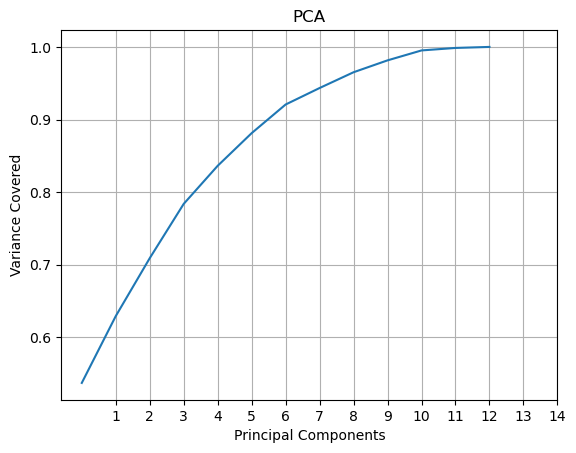

In [38]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,15,1))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

It is evident that it is best to select 10 features.

In [38]:
pca=PCA(n_components=10)

In [39]:
Xcomp=pca.fit_transform(X_scaled)

In [40]:
Xcomp

array([[ 0.49712748, -1.93633537, -1.91644213, ...,  0.72418033,
        -0.2315761 ,  0.2349833 ],
       [ 0.54569748, -1.90311655, -1.92069284, ...,  0.65565574,
        -0.39797564,  0.23300487],
       [ 0.25849127, -1.99219359, -1.90271259, ...,  0.89595636,
        -0.31791197, -0.00348629],
       ...,
       [ 1.35964578,  2.1561504 ,  1.78723001, ...,  0.56783986,
        -0.57282814, -0.31788979],
       [ 1.22035084,  2.1667959 ,  1.81927055, ...,  0.53057474,
        -0.52908973, -0.33863325],
       [ 1.29040118,  1.45450778,  1.77616649, ...,  0.50589712,
        -0.2321663 , -0.21901485]])

In [41]:
Ucomp=pca.fit_transform(U_scaled)

In [42]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(Xcomp,y, test_size=0.30,random_state=42)


In [44]:
y_train

6481     1.53
10978    1.93
17291    1.64
12333    1.77
17734    1.32
         ... 
11751    1.90
12431    1.24
5636     1.52
885      1.18
16262    1.90
Name: AveragePrice, Length: 12447, dtype: float64

In [45]:
U_train,U_test,v_train,v_test=train_test_split(Ucomp,v, test_size=0.30,random_state=42)

In [46]:
v_train

6481     16
10978    35
17291    48
12333     7
17734    11
         ..
11751    50
12431     9
5636      0
885      17
16262    28
Name: region, Length: 12447, dtype: int32

MODEL BUILDING

In [54]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, U_train,U_test,v_train,v_test, train=True):
    if train:
        y_pred=clf.predict(U_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(v_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(U_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(v_test,pred)*100:.2f}%")
          

In [55]:
#Using K Neighbors Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [76]:
knn.fit(U_train,v_train)

KNeighborsClassifier()

In [77]:
metric_score(knn,U_train,U_test,v_train,v_test,train=True)
metric_score(knn,U_train,U_test,v_train,v_test,train=False)



---------------Train Result-------------
Accuracy Score:75.75%

---------------Test Result-------------
Accuracy Score:55.88%


In [78]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [79]:
for k in range(3,6):
    cv_score=cross_val_score(knn,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.2416502197488851


 at 4, cross val score is 0.28146477894716604


 at 5, cross val score is 0.32083078629790335




In [68]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [81]:
dt.fit(U_train,v_train)

DecisionTreeClassifier()

In [82]:
metric_score(dt,U_train,U_test,v_train,v_test,train=True)
metric_score(dt,U_train,U_test,v_train,v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:63.84%


In [83]:
for k in range(3,6):
    cv_score=cross_val_score(dt,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.45607825750105063


 at 4, cross val score is 0.48863483410727504


 at 5, cross val score is 0.5352002088437287




In [56]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [57]:
rf.fit(U_train,v_train)

RandomForestClassifier()

In [51]:
metric_score(rf,U_train,U_test,v_train,v_test,train=True)
metric_score(rf,U_train,U_test,v_train,v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:82.19%


In [61]:
for k in range(3,6):
    cv_score=cross_val_score(rf,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.5554485595133655


 at 4, cross val score is 0.6160073487777591


 at 5, cross val score is 0.6713469029050592




In [103]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [104]:
gbdt.fit(U_train,v_train)

GradientBoostingClassifier()

In [105]:
metric_score(gbdt,U_train,U_test,v_train,v_test,train=True)
metric_score(gbdt,U_train,U_test,v_train,v_test,train=False)


---------------Train Result-------------
Accuracy Score:95.12%

---------------Test Result-------------
Accuracy Score:66.39%


In [ ]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.4109851559546533




In [84]:
import xgboost as xgb

In [85]:
xgb=xgb.XGBClassifier()

In [86]:
xgb.fit(U_train,v_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
metric_score(xgb,U_train,U_test,v_train,v_test,train=True)
metric_score(xgb,U_train,U_test,v_train,v_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:78.89%


In [89]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.4988198653417146


 at 4, cross val score is 0.5733809210083558


 at 5, cross val score is 0.6387317044323634




We are getting the best accuracy score for the Random Forest Classifier model. Also, at CV=4, we are getting 61% which is better than scores of all other models. So, we will be choosing Random Forest as our final model

In [58]:
y_pred = rf.predict(U_test)
data1 = pd.DataFrame({'Actual' : v_test, 'RF predicted': y_pred})

In [59]:
data1

,Actual,RF predicted
8858,31,50
735,14,14
15589,16,5
10308,22,22
8107,47,39
...,...,...
9132,0,0
11984,0,0
6444,15,15
18161,46,46


In [60]:
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [61]:
#Model instantiating and training
#Using Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [72]:
reg.fit(X_train,y_train)


LinearRegression()

In [73]:
pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train)}")
print(f" testing accuracy is {r2_score(y_test,pred_test)}")

 training accuracy is 0.48439698677102994
 testing accuracy is 0.4816534482970356


In [74]:
mean_score = metrics.mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 0.2240034362603193


In [ ]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(reg,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

In [91]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [93]:
pred_train1=gbr.predict(X_train)
pred_test1=gbr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train1)}")
print(f" testing accuracy is {r2_score(y_test,pred_test1)}")

 training accuracy is 0.6594796976204944
 testing accuracy is 0.6330954731407707


In [94]:
mean_score = metrics.mean_absolute_error(y_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 0.18506646908069807


In [96]:
for k in range(3,6):
    cv_score=cross_val_score(gbr,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.1464023196887474


 at 4, cross val score is 0.30685917088073983


 at 5, cross val score is 0.3712550060599752




In [65]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
pred_train3=rfr.predict(X_train)
pred_test3=rfr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train3)}")
print(f" testing accuracy is {r2_score(y_test,pred_test3)}")

 training accuracy is 0.9701181581285709
 testing accuracy is 0.7836638088782985


In [53]:
mean_score = metrics.mean_absolute_error(y_test,pred_test3)
print("Mean Absolute Error Score:",mean_score)

Mean Absolute Error Score: 0.1348235426429241


In [102]:
for k in range(3,6):
    cv_score=cross_val_score(rfr,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.03524265021304407


 at 4, cross val score is 0.10205471546546216


 at 5, cross val score is 0.24741690175528808




We are getting the best accuracy score for the Random Forest Regressor model. Also, we can see that difference in train and test score is also less.. So, we will be choosing Random Forest as our final model

In [62]:
data_n= pd.DataFrame({'Actual' : y_test, ' predicted': pred_test3})

In [63]:
data_n

,Actual,predicted
8858,1.35,1.2812
735,0.93,1.1223
15589,1.45,1.5618
10308,1.42,1.4107
8107,0.94,1.1849
...,...,...
9132,1.89,1.8802
11984,1.75,1.6317
6444,1.19,1.1716
18161,1.55,1.5391


In [63]:
#Saving the model
import pickle
rf = RandomForestClassifier()

model_filename = 'Avocado Classification Model'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

In [67]:
rfr = RandomForestRegressor()

model_filename = 'Avocado Regression Model'
with open(model_filename, 'wb') as file:
    pickle.dump(rfr, file)